In [1]:
import os,sys
sys.path.append(os.path.realpath('../lib'))
import pylab as pl
import numpy as np
import ot
import FGW

In [2]:
n=30
n3=int(n/3)
sig=0.1
siglab=0.1

np.random.seed(0)

xs1=sig*np.random.randn(n3,2)
xs1[:,0]+=1
xs2=sig*np.random.randn(n3,2)
xs2[:,1]+=1
xs3=3*sig*np.random.randn(n3,2)
xs3+=1
xs=np.vstack((xs1,xs2,xs3))
ys=np.vstack((np.ones((n3,1)),2*np.ones((n3,1)),3*np.ones((n3,1))))+siglab*np.random.randn(n3*3,1)

xs1=sig*np.random.randn(n3,2)
xs1[:,0]+=-1
xs2=sig*np.random.randn(n3,2)
xs2[:,1]+=-1
xs3=3*sig*np.random.randn(n3,2)
xs3+=-1
xt=np.vstack((xs2,xs1,xs3))
yt=np.vstack((1*np.ones((n3,1)),2*np.ones((n3,1)),3*np.ones((n3,1))))+siglab*np.random.randn(n3*3,1)

p=ot.unif(3*n3)
q=p

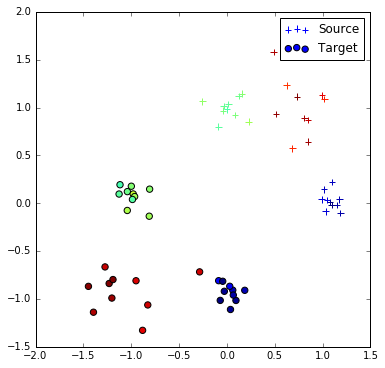

In [3]:
pl.figure(2,(6,6))

pl.scatter(xs[:,0],xs[:,1],s=40,c=ys.ravel(),marker='+',label='Source')
pl.scatter(xt[:,0],xt[:,1],s=40,c=yt.ravel(),marker='o',label='Target')
pl.legend()
pl.show()

In [4]:
C1=ot.dist(xs)
C2=ot.dist(xt)
M=ot.dist(ys,yt)
w1=ot.unif(C1.shape[0])
w2=ot.unif(C2.shape[0])
Got=ot.emd([],[],M)

In [5]:
Gg,log=FGW.gw_lp(C1,C2,p,q,loss_fun='square_loss',verbose=True,log=True)

It.  |Loss        |Delta loss
--------------------------------
    0|1.494609e+00|0.000000e+00
    1|1.239755e+00|-2.548541e-01
    2|2.503965e-01|-9.893584e-01
    3|1.974936e-01|-5.290295e-02
    4|1.924722e-01|-5.021344e-03
    5|1.922749e-01|-1.973338e-04
    6|1.922749e-01|0.000000e+00


In [6]:
alpha=0.4
ot.tic()
Gwg,logw=FGW.fgw_lp(M,C1,C2,p,q,loss_fun='square_loss',verbose=True,log=True)
ot.toc()


It.  |Loss        |Delta loss
--------------------------------
    0|2.913714e+00|0.000000e+00
    1|2.311711e-01|-2.682543e+00
    2|1.452459e-01|-8.592522e-02
    3|1.452459e-01|0.000000e+00
Elapsed time : 0.006885051727294922 s


0.006885051727294922

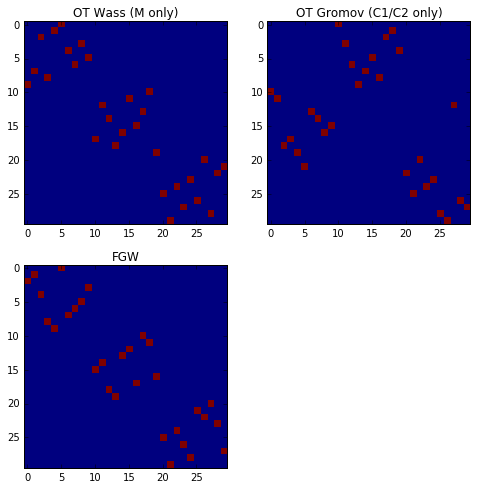

In [7]:
pl.figure(1,(8,8))

pl.subplot(2,2,1)    
pl.imshow(Got,interpolation='nearest')
pl.title('OT Wass (M only)')

pl.subplot(2,2,2)    
pl.imshow(Gg,interpolation='nearest')
pl.title('OT Gromov (C1/C2 only)')

pl.subplot(2,2,3)    
pl.imshow(Gwg,interpolation='nearest')
pl.title('FGW')
pl.show()

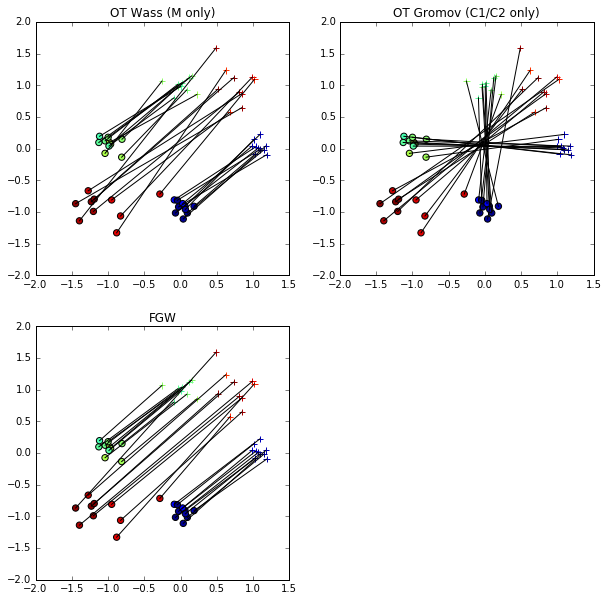

In [8]:
pl.figure(1,(10,10))
pl.subplot(2,2,1)    
pl.scatter(xs[:,0],xs[:,1],s=40,c=ys,marker='+',label='Source')
pl.scatter(xt[:,0],xt[:,1],s=40,c=yt,marker='o',label='Target')
G=Got
for i in range(n):
    for j in range(n):
        if G[i,j]>1e-6:
            pl.plot([xs[i,0],xt[j,0]],[xs[i,1],xt[j,1]],'k',alpha=G[i,j]*n)#,alpha=1.0-G[i,j]*n

pl.title('OT Wass (M only)')

pl.subplot(2,2,2)    
pl.scatter(xs[:,0],xs[:,1],s=40,c=ys,marker='+',label='Source')
pl.scatter(xt[:,0],xt[:,1],s=40,c=yt,marker='o',label='Target')
G=Gg
for i in range(n):
    for j in range(n):
        if G[i,j]>1e-6:
            pl.plot([xs[i,0],xt[j,0]],[xs[i,1],xt[j,1]],'k',alpha=G[i,j]*n)#,alpha=1.0-G[i,j]*n
pl.title('OT Gromov (C1/C2 only)')

pl.subplot(2,2,3)    
pl.scatter(xs[:,0],xs[:,1],s=40,c=ys,marker='+',label='Source')
pl.scatter(xt[:,0],xt[:,1],s=40,c=yt,marker='o',label='Target')
G=Gwg
for i in range(n):
    for j in range(n):
        if G[i,j]>1e-6:
            pl.plot([xs[i,0],xt[j,0]],[xs[i,1],xt[j,1]],'k',alpha=G[i,j]*n)#,alpha=1.0-G[i,j]*n
pl.title('FGW')
pl.show()